# WeatherPy
## Calculating weather for a set of 500+ cities
### The overall goal is to show how weather changes as we approach the equator. 

In [4]:
# setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f" There are {len(cities)} cities in this data set")

 There are 583 cities in this data set


### API Calls



In [6]:
#set units for the URL (want Fahrenheit & mph)
units = "imperial"
#set up log info
print("Beginning Data Retrieval")
print("----------------------------")

#set empty variable for holding data
city_data = []

#set variables for counting
number = 0
set_city = 1

#for loop for getting information on each city
for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
    response = requests.get(url).json()
    #some cities might not have results, use try/except to skip
    try:
        
        #information from 
        name = response["name"]
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        temp_max = response["main"]["temp_max"]
        hum = response["main"]["humidity"]
        cloud = response["clouds"]["all"]
        wind = response["wind"]["speed"] 
        country =  response["sys"]["country"]
        date =  response["dt"]
        
        #dictionary for all the data with columns labeled
        dict_data = {"City":name, "Latitude":lat, "Longitude":lng, "Max Temp":temp_max, "Humidity":hum,
                     "Cloudiness":cloud, "Wind Speed":wind, "Country":country, "Date":date}
        #append dictionary data to the empty city_data
        city_data.append(dict_data)
        
        #update numbers for printing
        number = number + 1
        
        #print log results
        print(f"Procesing Record {number} of Set {set_city} | {name}")
        
        #changing counting variables
        if number == 50:
            number = 0
            set_city = set_city + 1
    
    #for those cities not in the API
    except KeyError:
        print("City Not Found. Skipping...")
        continue

#finishing print log        
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
----------------------------
Procesing Record 1 of Set 1 | Busselton
Procesing Record 2 of Set 1 | Tuktoyaktuk
Procesing Record 3 of Set 1 | Mar del Plata
Procesing Record 4 of Set 1 | Punta Arenas
Procesing Record 5 of Set 1 | Ushuaia
City Not Found. Skipping...
Procesing Record 6 of Set 1 | Karratha
City Not Found. Skipping...
Procesing Record 7 of Set 1 | Nanortalik
Procesing Record 8 of Set 1 | Kavieng
Procesing Record 9 of Set 1 | Ust-Tsilma
Procesing Record 10 of Set 1 | Saint Paul Harbor
City Not Found. Skipping...
Procesing Record 11 of Set 1 | Sorrento
Procesing Record 12 of Set 1 | Cherskiy
Procesing Record 13 of Set 1 | Hermanus
Procesing Record 14 of Set 1 | Nikolskoye
Procesing Record 15 of Set 1 | Challans
City Not Found. Skipping...
Procesing Record 16 of Set 1 | Tasiilaq
Procesing Record 17 of Set 1 | Saint-Joseph
Procesing Record 18 of Set 1 | Souillac
Procesing Record 19 of Set 1 | Ayagoz
Procesing Record 20 of Set 1 | Hithadhoo
Procesing Reco

Procesing Record 36 of Set 4 | Kahului
Procesing Record 37 of Set 4 | Christchurch
Procesing Record 38 of Set 4 | Cabedelo
Procesing Record 39 of Set 4 | Freeport
Procesing Record 40 of Set 4 | Palmer
Procesing Record 41 of Set 4 | George Town
Procesing Record 42 of Set 4 | Sobolevo
Procesing Record 43 of Set 4 | Ribeira Brava
Procesing Record 44 of Set 4 | Te Anau
Procesing Record 45 of Set 4 | Vanimo
Procesing Record 46 of Set 4 | Omagh
Procesing Record 47 of Set 4 | Bengkulu
Procesing Record 48 of Set 4 | San Patricio
Procesing Record 49 of Set 4 | Teahupoo
Procesing Record 50 of Set 4 | Lokoja
City Not Found. Skipping...
Procesing Record 1 of Set 5 | Tongliao
Procesing Record 2 of Set 5 | Faya
City Not Found. Skipping...
Procesing Record 3 of Set 5 | Torbay
Procesing Record 4 of Set 5 | Hoquiam
Procesing Record 5 of Set 5 | Doha
Procesing Record 6 of Set 5 | Tyler
Procesing Record 7 of Set 5 | Inuvik
Procesing Record 8 of Set 5 | Brownwood
Procesing Record 9 of Set 5 | Mandalgovi
P

Procesing Record 26 of Set 8 | Vila Velha
Procesing Record 27 of Set 8 | Senno
Procesing Record 28 of Set 8 | Gīdolē
Procesing Record 29 of Set 8 | Mount Isa
Procesing Record 30 of Set 8 | Dale
Procesing Record 31 of Set 8 | Cabatuan
Procesing Record 32 of Set 8 | Yibin
City Not Found. Skipping...
Procesing Record 33 of Set 8 | Lenoir City
Procesing Record 34 of Set 8 | Kulhudhuffushi
Procesing Record 35 of Set 8 | Bathsheba
Procesing Record 36 of Set 8 | Tarakan
Procesing Record 37 of Set 8 | Bealanana
Procesing Record 38 of Set 8 | Whitehorse
Procesing Record 39 of Set 8 | Presidencia Roque Sáenz Peña
Procesing Record 40 of Set 8 | Calama
Procesing Record 41 of Set 8 | Lyuban'
City Not Found. Skipping...
Procesing Record 42 of Set 8 | Oussouye
Procesing Record 43 of Set 8 | Sayansk
Procesing Record 44 of Set 8 | Ixtapa
Procesing Record 45 of Set 8 | Conakry
Procesing Record 46 of Set 8 | Westport
Procesing Record 47 of Set 8 | Pahrump
Procesing Record 48 of Set 8 | Dicabisagan
Proces

## Converting API Data to DataFrame

In [11]:
#set information as a dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,93.99,9,4,5.68,AU,1607657665
1,Tuktoyaktuk,69.45,-133.04,-9.40,76,75,11.41,CA,1607657665
2,Mar del Plata,-38.00,-57.56,73.99,69,0,11.41,AR,1607657429
3,Punta Arenas,-53.15,-70.92,44.60,81,0,5.82,CL,1607657665
4,Ushuaia,-54.80,-68.30,50.00,76,75,4.92,AR,1607657666
...,...,...,...,...,...,...,...,...,...
518,Peace River,56.25,-117.29,14.00,85,5,12.75,CA,1607657759
519,Atikokan,48.76,-91.62,26.19,95,100,6.51,CA,1607657759
520,Norton Shores,43.17,-86.26,37.99,69,20,5.82,US,1607657588
521,Münster,51.96,7.63,33.01,88,0,4.70,DE,1607657760


## Export the data into a .csv.


In [12]:
#export to csv
city_data_df.to_csv(r"../Output_Data/Cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.


In [13]:
#do any cities have over 100% humidity
#show results
city_data_df[city_data_df["Humidity"] == 100]

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
14,Challans,46.84,-1.87,54.00,100,90,11.41,FR,1607657668
40,East London,-33.02,27.91,64.40,100,75,2.24,ZA,1607657672
175,Asău,46.43,26.40,33.80,100,75,2.24,RO,1607657694
219,Slaný,50.23,14.09,34.00,100,90,5.82,CZ,1607657702
262,Vilhena,-12.74,-60.15,67.39,100,100,4.29,BR,1607657533
279,Bonavista,48.65,-53.11,33.01,100,100,3.36,CA,1607657717
290,Mt. Pleasant,32.79,-79.86,51.01,100,1,3.33,US,1607657719
313,Kamaishi,39.27,141.88,39.20,100,75,1.12,JP,1607657723
319,Tete,-16.16,33.59,77.00,100,75,3.60,MZ,1607657724
366,Mayo,38.89,-76.51,39.20,100,1,7.23,US,1607657731


In [14]:
#remove cities with over 100% humidity
#use this data frame
clean_city_data = city_data_df[(city_data_df["Humidity"] < 100)]
clean_city_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,93.99,9,4,5.68,AU,1607657665
1,Tuktoyaktuk,69.45,-133.04,-9.40,76,75,11.41,CA,1607657665
2,Mar del Plata,-38.00,-57.56,73.99,69,0,11.41,AR,1607657429
3,Punta Arenas,-53.15,-70.92,44.60,81,0,5.82,CL,1607657665
4,Ushuaia,-54.80,-68.30,50.00,76,75,4.92,AR,1607657666


# Plotting the Data as Scatter Plots
#### Total of 12 Scatter Plots

## Latitude vs. Temperature Plot

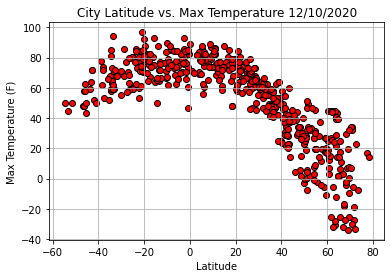

In [23]:
#using the clean_city_data plot several scatter plots
#plot 1
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Max Temp"]
plt.title("City Latitude vs. Max Temperature 12/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.scatter(x_axis, y_axis, marker = "o", color = "red", edgecolor = "black")
plt.grid()
plt.savefig("../Images/01-ScatterPlot.png", format='png')
plt.show()


#### Analysis Plot 1: Latitude vs. Temperature Plot
This scatter plot is comparing the maximum temperature against the latitude. We can see that incrasing temperatures as we move closer to where the latitude equals 0 (i.e. the equator).

## Latitude vs. Humidity Plot

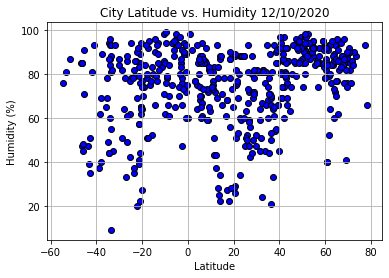

In [24]:
#plot 2
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Humidity"]
plt.title("City Latitude vs. Humidity 12/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(x_axis, y_axis, marker = "o", color = "blue", edgecolor = "black")
plt.grid()
plt.savefig("../Images/02-ScatterPlot.png", format='png')
plt.show()

#### Analysis Plot 2: Latitude vs. Humidity Plot
This plot is analyzing humidity against the latitude of each city. There isn't much of a correlation for humidity versus the latitude as there is a lot of variety in the data. The dataset did remove any city with 100% humidity however. 

## Latitude vs. Cloudiness Plot

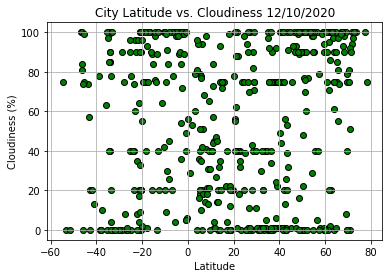

In [25]:
#plot 3
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Cloudiness"]
plt.title("City Latitude vs. Cloudiness 12/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(x_axis, y_axis, marker = "o", color = "green", edgecolor = "black")
plt.grid()
plt.savefig("../Images/03-ScatterPlot.png", format='png')
plt.show()

#### Analysis Plot 3: Latitude vs. Cloudiness Plot
This plot is analyzing the cloudiness of each city against its latitude. Like with the previous one, there's a lot of variation in the data. No stand out correlation. 

## Latitude vs. Wind Speed Plot

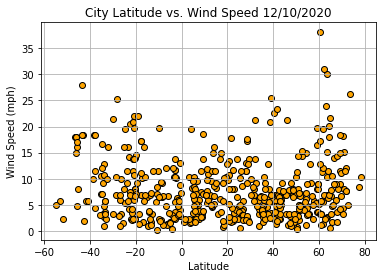

In [26]:
#plot 4
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Wind Speed"]
plt.title("City Latitude vs. Wind Speed 12/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(x_axis, y_axis, marker = "o", color = "orange", edgecolor = "black")
plt.grid()
plt.savefig("../Images/04-ScatterPlot.png", format='png')
plt.show()

#### Analysis Plot 4: Latitude vs. Wind Speed Plot
This plot is comparing the wind speed to the city latitude. Again, lots of variation, and no discernable pattern. 

## Linear Regression

In [27]:
#set new data frame that is only northern hemisphere
north_hem = clean_city_data.loc[city_data_df["Latitude"] >= 0]
north_hem.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Tuktoyaktuk,69.45,-133.04,-9.40,76,75,11.41,CA,1607657665
6,Nanortalik,60.14,-45.24,24.98,82,0,5.17,GL,1607657666
8,Ust-Tsilma,65.44,52.15,17.83,94,81,6.64,RU,1607657666
9,Saint Paul Harbor,57.79,-152.41,19.40,85,1,5.82,US,1607657667
10,Sorrento,40.63,14.37,48.99,81,75,6.93,IT,1607657667


In [28]:
#set second new data frame that is only southern hemisphere
south_hem = clean_city_data.loc[city_data_df["Latitude"] < 0]
south_hem.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,93.99,9,4,5.68,AU,1607657665
2,Mar del Plata,-38.00,-57.56,73.99,69,0,11.41,AR,1607657429
3,Punta Arenas,-53.15,-70.92,44.60,81,0,5.82,CL,1607657665
4,Ushuaia,-54.80,-68.30,50.00,76,75,4.92,AR,1607657666
5,Karratha,-20.74,116.85,73.65,85,100,19.62,AU,1607657605


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8715739530169319


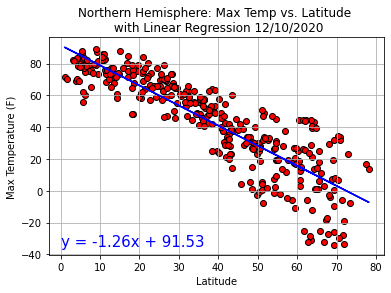

In [30]:
#plot 5
x_axis = north_hem["Latitude"]
y_axis = north_hem["Max Temp"]
plt.title("Northern Hemisphere: Max Temp vs. Latitude \n with Linear Regression 12/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.scatter(x_axis, y_axis, marker = "o", color = "red", edgecolor = "black")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-", color = "blue")
plt.annotate(line_eq,(0,-35),fontsize=15,color="blue")
print(f"The r-value is: {rvalue}")
plt.savefig("../Images/05-ScatterPlot.png", format='png')
plt.show()


#### Analysis Plot 5: Northern Hemisphere: Max Temp vs Latitude w/Linear Regression
This plot is analyzing just the northen hemisphere with maximum temperature against the latitude. We can see the linear regression line (in blue), and it is showing a very strong negative correlation (r = -.87) of the two variables. As we move further from the equator (latitude = 0), the temperature decreases. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5248707010054076


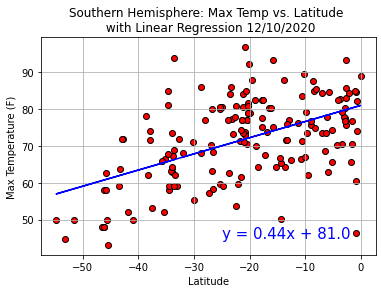

In [31]:
#plot 6
x_axis = south_hem["Latitude"]
y_axis = south_hem["Max Temp"]
plt.title("Southern Hemisphere: Max Temp vs. Latitude \n with Linear Regression 12/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.scatter(x_axis, y_axis, marker = "o", color = "red", edgecolor = "black")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-", color = "blue")
plt.annotate(line_eq,(-25,45),fontsize=15,color="blue")
print(f"The r-value is: {rvalue}")
plt.savefig("../Images/06-ScatterPlot.png", format='png')
plt.show()

#### Analysis Plot 6: Southern Hemisphere: Max Temp vs Latitude w/Linear Regression
This plot is analyzing the southern hemisphere comparing maximum temp to the city's latitude with linear regression line (in blue). This one has a moderate positive correlation (r = .52) showing that as we get closer to the equator the temperature increases. This one is giving us the same result, closer to the equator the higher the temperature, as the previous plot just explored in reverse. However, the southern hemishere has a weaker correlation. It should be noted that this dataset has less data points than the northern set. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3529867738356832


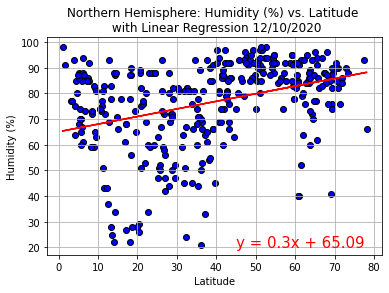

In [32]:
#plot 7
x_axis = north_hem["Latitude"]
y_axis = north_hem["Humidity"]
plt.title("Northern Hemisphere: Humidity (%) vs. Latitude \n with Linear Regression 12/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(x_axis, y_axis, marker = "o", color = "blue", edgecolor = "black")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.savefig("../Images/07-ScatterPlot.png", format='png')
plt.show()

#### Analysis Plot 7: Northern Hemisphere: Humidity vs Latitude w/Linear Regression
This plot is showing a showing the correlation for the northern hemisphere of humidty and city latitude. There is a  weak positive correlation (r = .35) of the humidity increasing as we move further north away from the equator.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.26389316092194415


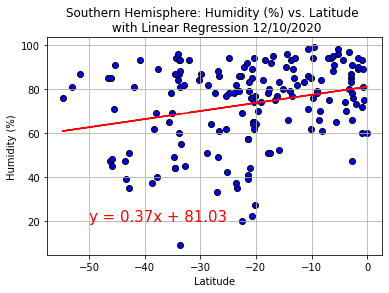

In [33]:
#plot 8
x_axis = south_hem["Latitude"]
y_axis = south_hem["Humidity"]
plt.title("Southern Hemisphere: Humidity (%) vs. Latitude \n with Linear Regression 12/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(x_axis, y_axis, marker = "o", color = "blue", edgecolor = "black")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.savefig("../Images/08-ScatterPlot.png", format='png')
plt.show()

#### Analysis Plot 8: Southern Hemisphere: Humidity vs Latitude w/Linear Regression
This plot is showing the correlation for the southern hemisphere for the humidity versus the city latitude. This one also has a very weak positive correlation (r = .26). Just like the previous plot for the same variables in the northern hemisphere, it's positive. However, it is a much weaker correlation, potentially considered having no correlation. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3190286899198429


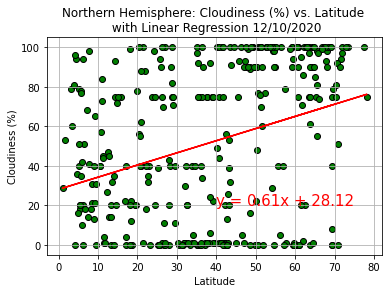

In [34]:
#plot 9
x_axis = north_hem["Latitude"]
y_axis = north_hem["Cloudiness"]
plt.title("Northern Hemisphere: Cloudiness (%) vs. Latitude \n with Linear Regression 12/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(x_axis, y_axis, marker = "o", color = "green", edgecolor = "black")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.savefig("../Images/09-ScatterPlot.png", format='png')
plt.show()

#### Analysis Plot 9: Northern Hemisphere: Cloudiness vs Latitude w/Linear Regression
This plot is comparing the cloudiness against the latitude in the northern hemisphere. Despite visually appearing very sporadic and not having much of a correlation, the data suggests that there is a weak positive correlation (r = .319) between the two. That means going further from the equator, there is more cloudiness as a percentage. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.25201240561082683


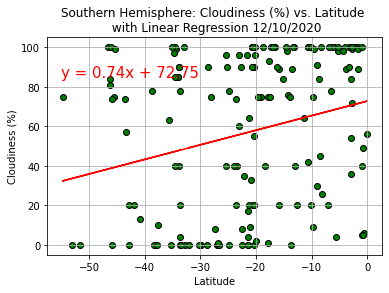

In [35]:
#plot 10
x_axis = south_hem["Latitude"]
y_axis = south_hem["Cloudiness"]
plt.title("Southern Hemisphere: Cloudiness (%) vs. Latitude \n with Linear Regression 12/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(x_axis, y_axis, marker = "o", color = "green", edgecolor = "black")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.savefig("../Images/10-ScatterPlot.png", format='png')
plt.show()

#### Analysis Plot 10: Southern Hemisphere: Cloudiness vs Latitude w/Linear Regression
This plot is showing the cloudiness vs latitude for the southern hemisphere. There is a very weak positive correlation (r = .25) for this dataset showing that as we get closer to the equator the cloudiness increases somewhat. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.15422469509507872


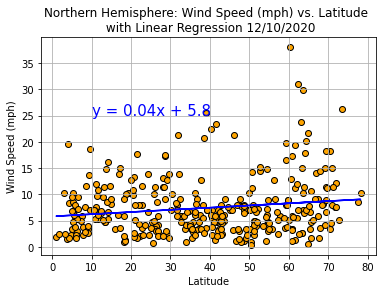

In [36]:
#plot 11
x_axis = north_hem["Latitude"]
y_axis = north_hem["Wind Speed"]
plt.title("Northern Hemisphere: Wind Speed (mph) vs. Latitude \n with Linear Regression 12/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(x_axis, y_axis, marker = "o", color = "orange", edgecolor = "black")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-", color = "blue")
plt.annotate(line_eq,(10,25),fontsize=15,color="blue")
print(f"The r-value is: {rvalue}")
plt.savefig("../Images/11-ScatterPlot.png", format='png')
plt.show()

#### Analysis Plot 11: Northern Hemisphere: Wind Speed vs Latitude w/Linear Regression
This plot is showing the wind speed vs latitude for the northern hemisphere. There is a very weak positive correlation here (r=.15), which means the wind speed is increasing as you move farther from the equator (latitude = 0). However, the value is closer to zero than most of the other r-values, so there is much less correlation between wind speed and latitude for the norhtern hemisphere. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2671184503069464


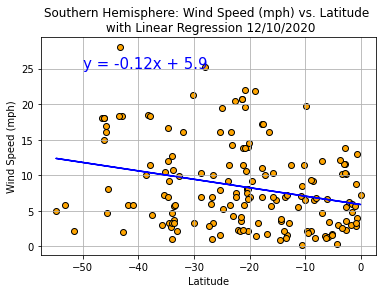

In [37]:
#plot 12
x_axis = south_hem["Latitude"]
y_axis = south_hem["Wind Speed"]
plt.title("Southern Hemisphere: Wind Speed (mph) vs. Latitude \n with Linear Regression 12/10/2020")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(x_axis, y_axis, marker = "o", color = "orange", edgecolor = "black")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-", color = "blue")
plt.annotate(line_eq,(-50,25),fontsize=15,color="blue")
print(f"The r-value is: {rvalue}")
plt.savefig("../Images/12-ScatterPlot.png", format='png')
plt.show()

#### Analysis Plot 12: Southern Hemisphere: Wind Speed vs Latitude w/Linear Regression
This last plot is for wind speed versus latitude in the southern hemisphere. There is a weak negative correlation (r = -0.26) showing that as we get closer to the equator (latitude = 0) the wind speed decreases to some degree which is agreement with the previous graph. Wind speed decreases as we get closer to the equator and increases moving away from it. 